# Cvičenie č. 2

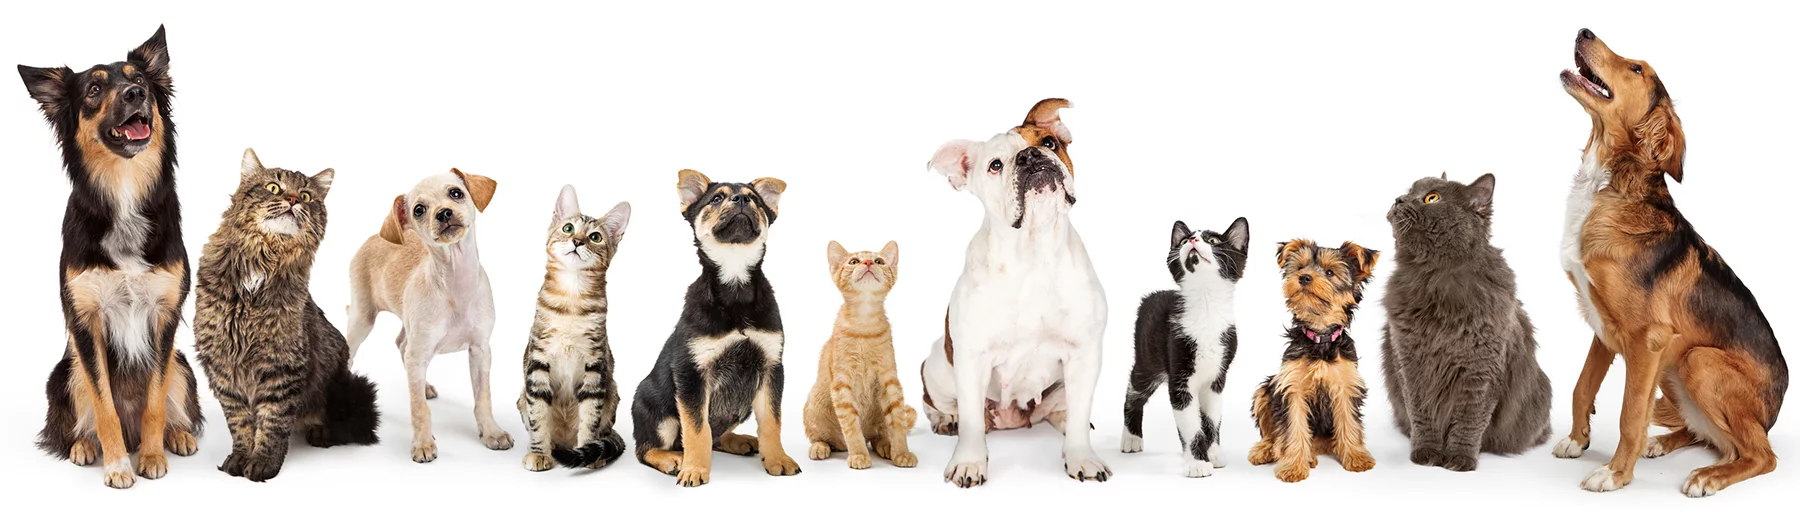

Počas semestra budete na cvičeniach vypracovávať úlohy, ktoré vám pomôžu pri riešení zadaní. Na všetkých cvičeniach budete pracovať s tou istou dátovou sadou (v zadaniach dostanete iné). Jedná sa o dátovú množinu obsahujúcu informácie z portálu petfinder.my, ktorý sa venuje adopcii zvieratiek.

Pri vypracovaní úloh z cvičenia môžete použit vlastný editor, alebo si vytvorte kópiu tohto notebook-u na svojom Google Drive a editujte ho tam.

K dispozícii budete mať dve dátové sady, trénovaciu a testovaciu. Oba sa nachádzajú na nasledovnej linke: [DATA](https://drive.google.com/drive/folders/1rCTyu6CbEXx3Gl9r37fXMywL36WqBb5U?usp=sharing).

Ak budete pracovať vo vlastnom editore:


1.   stiahnite si súbory z vyššie uvedenej linky,
2.   načítajte ich priamo z lokálneho úložiska.

Ak budete pracovať v Colab-e:


1.   vytvorte si kópiu tohto notebook-u na svojom Google Drive,
2.   stiahnite si súbory z vyššie uvedenej linky a nahrajte ich na svoj Google Drive (ideálne do nejakého priečinka, môžete si sem ukladať aj kópie notebook-ov z ostatných cvičení),
3. spustite nasledovný príkaz (umožníte ním prístup k vášmu Google Drive pre tento notebook):


```
from google.colab import drive
drive.mount('/content/drive')
```
4. nastavte si premennú smerujúcu k nahratým súborom, napr. v mojom prípade:


```
data_path = '/content/drive/MyDrive/SUNS-2022/data/'
```
5. ďalej v kóde môžete používať cestu:


```
train_data_path = data_path + 'train_data.csv'
test_data_path = data_path + 'test_data.csv'
```

Linky na knižnice, ktoré vám môžu uľahčiť prácu pri vypracovávaní úloh:


*   [Pandas](https://pandas.pydata.org/docs/)
*   [NumPy](https://numpy.org/)
*   [Matplotlib](https://matplotlib.org/)
*   [Plotly](https://plotly.com/python/)
* [Seaborn](https://seaborn.pydata.org/)
* [Yellowbrick](https://www.scikit-yb.org/en/latest/)
*   [Scikit-learn](https://scikit-learn.org/stable/)
*   [Keras](https://keras.io/)
*   [Tensorflow](https://www.tensorflow.org/?gclid=EAIaIQobChMI7v35kq-0-gIVToODBx22BQiaEAAYASAAEgL70fD_BwE)

Ak budete používať Colab, väčšinu bežne používaných knižníc nemusíte inštalovať, stačí ich importnúť v kóde. Pri použití vlastného editora odporúčame vytvoriť virtual environment do ktorého si nainštalujete potrebné knižnice.

In [37]:
import numpy as np
import pandas

data_path = '/Users/adam.samko/Documents/SUNS/cvicenia/cv2/data/'

train_data_path = data_path + 'train_data.csv'
test_data_path = data_path + 'test_data.csv'

parsed_train_data = pandas.read_csv(train_data_path)
parsed_test_data = pandas.read_csv(test_data_path)

trained_df = pandas.DataFrame(parsed_train_data)
test_df = pandas.DataFrame(parsed_test_data)
trained_df.info

<bound method DataFrame.info of       Species        Name  Age (days)  Gender MaturitySize FurLength  \
0         Dog     Patches        11.0  Female       Medium     Short   
1         Dog   Lala Girl         3.0  Female       Medium    Medium   
2         Dog   Keen Keen         1.0  Female       Medium     Short   
3         Dog       Yorky         4.0    Male        Small      Long   
4         Dog        Ocha         5.0  Female       Medium     Short   
...       ...         ...         ...     ...          ...       ...   
11989     Cat  The Kiddos         1.0   Mixed       Medium    Medium   
11990     Cat  Kaya Bread         2.0  Female       Medium     Short   
11991     Cat    Siam Boy         1.0    Male        Large    Medium   
11992     Dog        Gaby         2.0  Female       Medium     Short   
11993     Dog      Bailey         5.0  Female       Medium     Short   

      Vaccinated  Dewormed Sterilized   Health  ...      PetID  PhotoAmt  \
0             No        No 

In [38]:
trained_df.shape

(11994, 25)

1. Načítajte dáta a vypíšte prvých pár riadkov. Vypíšte rozmer tabuľlky (počet riadkov a stĺpcov).
Linky:


*   [Načítanie súboru](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


*   [Výpis riadkov](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)



In [39]:
trained_df.columns
len(trained_df.index)
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994 entries, 0 to 11993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Species                 11994 non-null  object 
 1   Name                    10961 non-null  object 
 2   Age (days)              11994 non-null  float64
 3   Gender                  11994 non-null  object 
 4   MaturitySize            11994 non-null  object 
 5   FurLength               11994 non-null  object 
 6   Vaccinated              11994 non-null  object 
 7   Dewormed                11994 non-null  object 
 8   Sterilized              11994 non-null  object 
 9   Health                  11994 non-null  object 
 10  Quantity                11994 non-null  float64
 11  Fee                     11994 non-null  float64
 12  RescuerID               11994 non-null  object 
 13  VideoAmt                11994 non-null  float64
 14  Description             11985 non-null

In [40]:
trained_df.dtypes

Species                    object
Name                       object
Age (days)                float64
Gender                     object
MaturitySize               object
FurLength                  object
Vaccinated                 object
Dewormed                   object
Sterilized                 object
Health                     object
Quantity                  float64
Fee                       float64
RescuerID                  object
VideoAmt                  float64
Description                object
PetID                      object
PhotoAmt                  float64
AdoptionSpeed              object
StateName                  object
Primary Breed              object
Secondary Breed            object
Color 1                    object
Color 2                    object
Color 3                    object
AdoptionSpeed (months)      int64
dtype: object

In [41]:
test_df.dtypes

Species                    object
Name                       object
Age (days)                  int64
Gender                     object
MaturitySize               object
FurLength                  object
Vaccinated                 object
Dewormed                   object
Sterilized                 object
Health                     object
Quantity                    int64
Fee                         int64
RescuerID                  object
VideoAmt                    int64
Description                object
PetID                      object
PhotoAmt                  float64
AdoptionSpeed              object
StateName                  object
Primary Breed              object
Secondary Breed            object
Color 1                    object
Color 2                    object
Color 3                    object
AdoptionSpeed (months)      int64
dtype: object

In [42]:
trained_df.dtypes == test_df.dtypes

Species                    True
Name                       True
Age (days)                False
Gender                     True
MaturitySize               True
FurLength                  True
Vaccinated                 True
Dewormed                   True
Sterilized                 True
Health                     True
Quantity                  False
Fee                       False
RescuerID                  True
VideoAmt                  False
Description                True
PetID                      True
PhotoAmt                   True
AdoptionSpeed              True
StateName                  True
Primary Breed              True
Secondary Breed            True
Color 1                    True
Color 2                    True
Color 3                    True
AdoptionSpeed (months)     True
dtype: bool

Popis jednotlivých stĺpcov tabuľky:

*   PetID - unikátne ID profilu zvieratka,
*   AdoptionSpeed - kategorická hodnota vyjadrujúca rýchlosť adopcie,
*   AdoptionSpeed (months) - číselná hodnota vyjadrujúca rýchlosť adopcie v mesiacoch,
* Type - typ zvieratka,
* Name - meno,
* Age - vek (v mesiacoch),
* Breed1 - primárna rasa,
* Breed2 - sekundárna rasa (v prípade miešancov),
* Gender - pohlavie (Mixed - zmiešané, ak profil reprezentuje skupinu zvieratiek),
* Color1 - farba 1,
* Color2 - farba 2,
* Color3 - farba 3,
* MaturitySize - veľkost v dospelosti,
* FurLength - dĺžka srsti,
* Vaccinated - vakcinácia,
* Dewormed - odčervnenie,
* Sterilized - sterilizácia,
* Health - zdravotný stav,
* Quantity - počet zvieratiek v profile,
* Fee - cena adopcie,
* State - štát v Malajzii,
* RescuerID - unikátne ID záchrancu,
* VideoAmt - počet videí,
* PhotoAmt - počet obrázkov,
* Description - popis.

2. Vypíšte počet záznamov, názov a typ stĺpcov v jednotlivých množinách. Uistite sa, že trénovacia a testovacia množina majú rovnaké názvy a typy stĺpcov. Všimnite si, že testovacia množina je menej početná ako trénovacia. Na ďalších zadaniach budete pracovať aj s validačnou množinou, zatiaľ ju nebudete potrebovať.

Linky:


*   [Názvy stĺpcov](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)
*   [Typy stĺpcov](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)



3. Zistite, či množiny neobsahujú neobvyklé hodnoty. Ak áno, odstráňte ich (nie však z testovacej množiny). *Pri mazaní záznamov vždy najskôr zvážte, či takýmto úkonom neprídete o priveľké množstvo dát.*

Pri hľadaní neobvyklých hodnôt sledujte výskyt:

*   nezmyselných hodnôt (napr. pri stĺpci s označením druhu ovocia nedáva zmysel hodnota "auto"),
*   hodnôt mimo rozsah (napr. ak stĺpec obsahuje výšku dospelej osoby v metroch, hodnota -1.5 alebo 20 nedávajú zmysel),
* výskyt hodnôt v rozsahu s príliš malým množstvom záznamov (napr. ak chceme rozlišovať druh oblečenia a spomedzi 5000 záznamov máme len 3 záznamy s označením "rolák", alebo ak sledujeme množstvo vypitej kávy študentmi slovenských vysokých škôl a máme len 2 čo nepijú kávu vôbec a jedného, ktorý vypije 15 káv denne).

V poslednom zo spomenutých prípadov sa zamyslite, či nie je vhodné určité kategórie zlúčiť a získať tak početnejšiu kategóriu.

Pomôžte si grafom (napr. histogram, boxplot, koláčový graf, stĺpcový graf) - zvoľte ho vhodne podľa typu stĺpca.

Linky (pre Matplotlib, môžete použiť akúkoľvek inú knižnicu z vyššie uvedených alebo podľa vlastného výberu):


*   [Matplotlib - histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
*   [Matplotlib - boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
*   [Matplotlib - pie plot](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)
*   [Matplotlib - bar plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)


a.) Nezmyselne hodnoty

* Zobraz vsetky variacie nenumerickych hodnot a skontroluj nezmysly

In [43]:


str_var = trained_df.select_dtypes(exclude= 'number').columns.tolist()
for i, var in enumerate(str_var):
    x = trained_df[var].value_counts()
    print('-' * 40 + var + '-' * 40 )
    print(x)



----------------------------------------Species----------------------------------------
Dog      6555
Cat      5433
food        3
towel       2
car         1
Name: Species, dtype: int64
----------------------------------------Name----------------------------------------
Lucky                                  53
Baby                                   46
No Name                                46
Mimi                                   44
Brownie                                42
                                       ..
Chi-yaya (Min. Pin Mix Small Breed)     1
Doberman  Mix Puppies                   1
King Tut (Tut)                          1
Mix Gender Puppies                      1
Gaby                                    1
Name: Name, Length: 7455, dtype: int64
----------------------------------------Gender----------------------------------------
Female    5853
Male      4404
Mixed     1737
Name: Gender, dtype: int64
----------------------------------------MaturitySize-----------------

In [44]:
# droping unresonable values
trained_df = trained_df[trained_df['Species'].isin(['Dog',"Cat"])];
trained_df.info

<bound method DataFrame.info of       Species        Name  Age (days)  Gender MaturitySize FurLength  \
0         Dog     Patches        11.0  Female       Medium     Short   
1         Dog   Lala Girl         3.0  Female       Medium    Medium   
2         Dog   Keen Keen         1.0  Female       Medium     Short   
3         Dog       Yorky         4.0    Male        Small      Long   
4         Dog        Ocha         5.0  Female       Medium     Short   
...       ...         ...         ...     ...          ...       ...   
11989     Cat  The Kiddos         1.0   Mixed       Medium    Medium   
11990     Cat  Kaya Bread         2.0  Female       Medium     Short   
11991     Cat    Siam Boy         1.0    Male        Large    Medium   
11992     Dog        Gaby         2.0  Female       Medium     Short   
11993     Dog      Bailey         5.0  Female       Medium     Short   

      Vaccinated  Dewormed Sterilized   Health  ...      PetID  PhotoAmt  \
0             No        No 

* Hodnoty mimo rozsah (numericke)

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#Identifiing Irregular numeric Data (Outliers)
# Identifiing Irregular Data by creating distribution table
trained_df.describe()

,Age (days),Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed (months)
count,11988.000000,1.198800e+04,11988.000000,11988.000000,11988.000000,11988.000000
mean,10.604021,2.714204e+02,21.434685,0.057808,3.872039,67.070070
std,20.648014,2.954525e+04,80.189104,0.352438,3.462484,72.398966
min,-10.000000,-2.200000e-01,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000e+00,0.000000,0.000000,2.000000,9.000000
50%,3.000000,1.000000e+00,0.000000,0.000000,3.000000,31.000000
75%,12.000000,1.000000e+00,0.000000,0.000000,5.000000,108.000000
max,933.000000,3.234903e+06,3000.000000,8.000000,30.000000,250.000000


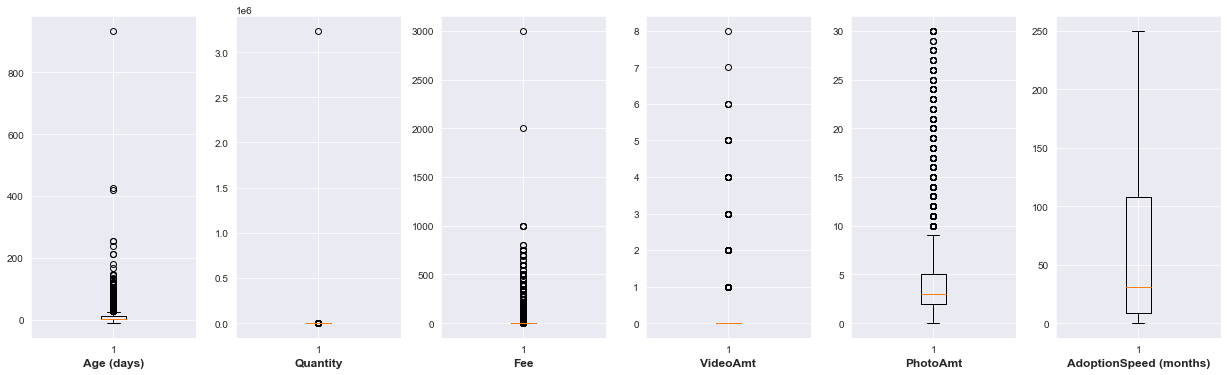

In [47]:
# Identifiing Irregular numeric Data by creating boxplot graph of data
num_var = trained_df.select_dtypes(include= 'number').columns.tolist()
plt.figure(figsize=(20,20))
for i, var in enumerate(num_var):
    plt.subplot(4,7,1+i)
    plt.boxplot(trained_df[var].dropna())
    plt.xlabel(var,fontsize=12, weight='bold')
plt.tight_layout()

In [48]:
#fix Irregular numeric data
# droping unreasonable numeric values using logic
trained_df = trained_df[trained_df['Age (days)'] >= 1]

In [49]:
trained_df = trained_df[trained_df['Quantity'] <= 20]
trained_df = trained_df[trained_df['Quantity'] > 0]
trained_df = trained_df[trained_df['Fee'] >= 0]
trained_df = trained_df[trained_df['VideoAmt'] >= 0]
trained_df = trained_df[trained_df['PhotoAmt'] >= 0]
trained_df = trained_df[trained_df['AdoptionSpeed (months)'] >= 1]
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11527 entries, 0 to 11993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Species                 11527 non-null  object 
 1   Name                    10548 non-null  object 
 2   Age (days)              11527 non-null  float64
 3   Gender                  11527 non-null  object 
 4   MaturitySize            11527 non-null  object 
 5   FurLength               11527 non-null  object 
 6   Vaccinated              11527 non-null  object 
 7   Dewormed                11527 non-null  object 
 8   Sterilized              11527 non-null  object 
 9   Health                  11527 non-null  object 
 10  Quantity                11527 non-null  float64
 11  Fee                     11527 non-null  float64
 12  RescuerID               11527 non-null  object 
 13  VideoAmt                11527 non-null  float64
 14  Description             11519 non-null

Species - 0.0%
Name - 8.493103149128133%
Age (days) - 0.0%
Gender - 0.0%
MaturitySize - 0.0%
FurLength - 0.0%
Vaccinated - 0.0%
Dewormed - 0.0%
Sterilized - 0.0%
Health - 0.0%
Quantity - 0.0%
Fee - 0.0%
RescuerID - 0.0%
VideoAmt - 0.0%
Description - 0.06940227292443828%
PetID - 0.0%
PhotoAmt - 0.0%
AdoptionSpeed - 0.0%
StateName - 0.0%
Primary Breed - 0.04337642057777392%
Secondary Breed - 72.1783638414158%
Color 1 - 0.0%
Color 2 - 29.730198664006245%
Color 3 - 71.11997917931812%
AdoptionSpeed (months) - 0.0%


<AxesSubplot:>

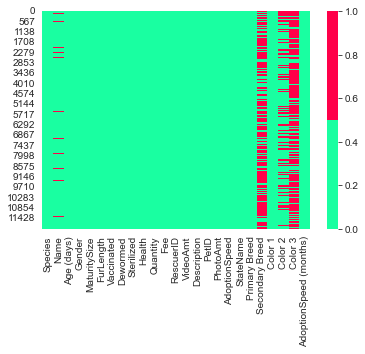

In [50]:
# identifiing undefined columns
#  Data Percentage List
for col in trained_df.columns:
    pct_missing = np.mean(trained_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
#  Data Heatmap
cols = trained_df.columns
colours = ['#19FFA1', '#FF0049']
sns.heatmap(trained_df[cols].isnull(), cmap=sns.color_palette(colours))

In [51]:
# fix missing values in column Name and color 2 by replacing it with '_MISSING_' string value.
# trained_df['Name'] = trained_df['Name'].fillna('_MISSING_')
# trained_df['Color 2'] = trained_df['Color 2'].fillna('_MISSING_')
# fix missing values in columns Secondary Breed and Color 3 by dropping them because these columns have 71% and 72% data missing, so we assume they don't provide useful information.
columns_to_drop = ['Secondary Breed', 'Color 2', 'Color 3', 'Name', 'RescuerID', 'Description', 'PetID']
trained_df = trained_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)

Species - 0.0%
Age (days) - 0.0%
Gender - 0.0%
MaturitySize - 0.0%
FurLength - 0.0%
Vaccinated - 0.0%
Dewormed - 0.0%
Sterilized - 0.0%
Health - 0.0%
Quantity - 0.0%
Fee - 0.0%
VideoAmt - 0.0%
PhotoAmt - 0.0%
AdoptionSpeed - 0.0%
StateName - 0.0%
Primary Breed - 0.04337642057777392%
Color 1 - 0.0%
AdoptionSpeed (months) - 0.0%


<AxesSubplot:>

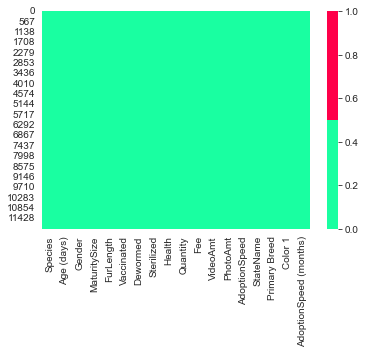

In [52]:
# verification undefined columns are fixed
#  Data Percentage List
for col in trained_df.columns:
    pct_missing = np.mean(trained_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
#  Data Heatmap
cols = trained_df.columns
colours = ['#19FFA1', '#FF0049']
sns.heatmap(trained_df[cols].isnull(), cmap=sns.color_palette(colours))

In [53]:
# drop rows with NaN
trained_df.dropna()
# drop rows with null in Primary Breed
trained_df = trained_df[trained_df['Primary Breed'].notnull()]

* * výskyt hodnôt v rozsahu s príliš malým množstvom záznamov

In [54]:
trained_df.describe()

,Age (days),Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed (months)
count,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000
mean,10.733640,1.562489,21.650148,0.058063,3.887867,69.088006
std,20.794675,1.458731,80.402606,0.355272,3.474299,72.604753
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,2.000000,11.000000
50%,3.000000,1.000000,0.000000,0.000000,3.000000,35.000000
75%,12.000000,1.000000,0.000000,0.000000,5.000000,112.000000
max,933.000000,20.000000,3000.000000,8.000000,30.000000,250.000000


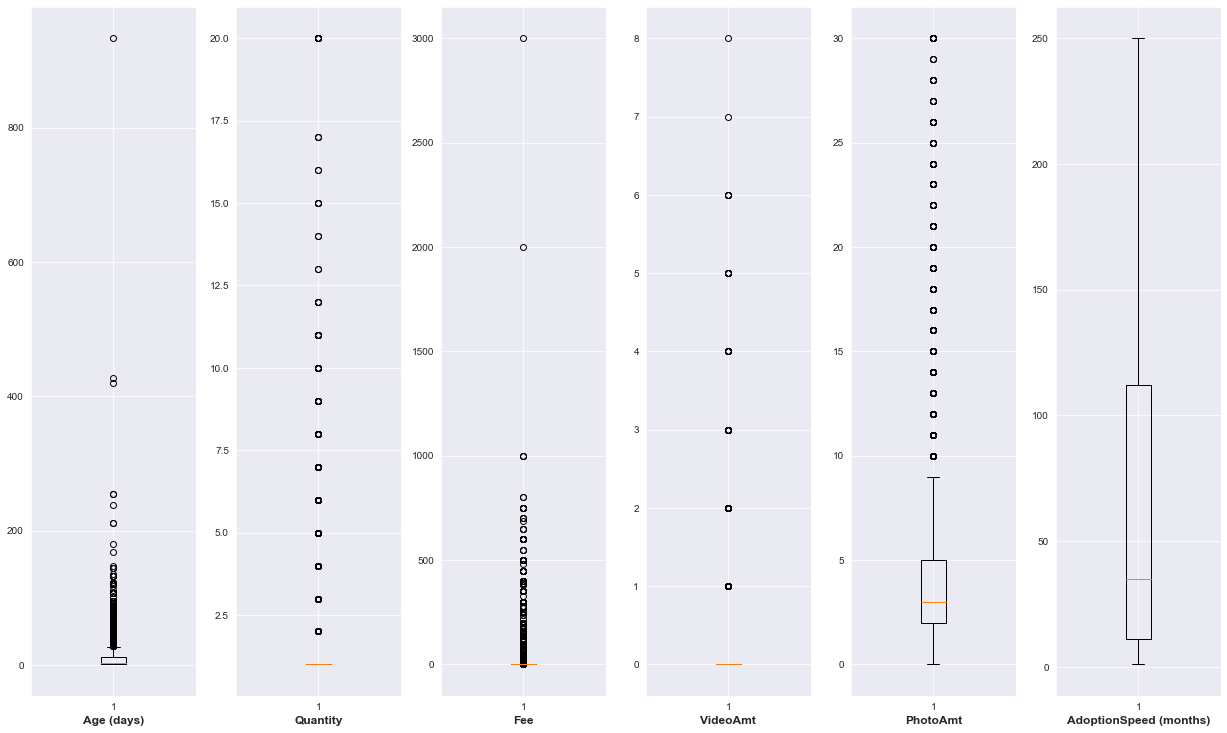

In [55]:
#  Verification by utilising boxplot graph of data
num_var = trained_df.select_dtypes(include= 'number').columns.tolist()
plt.figure(figsize=(20,20))
for i, var in enumerate(num_var):
    plt.subplot(2,7,1+i)
    plt.boxplot(trained_df[var].dropna())
    plt.xlabel(var,fontsize=12, weight='bold')
plt.tight_layout()

<AxesSubplot:ylabel='MaturitySize'>

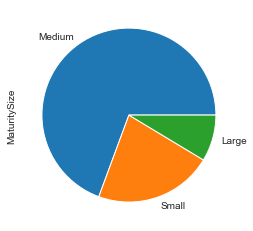

In [56]:
#fix Irregular string data
# Nahradenie kategorie Extra Large za Large kvoli nizkemu poctu zaznamov
trained_df['MaturitySize'] = trained_df.MaturitySize.replace(to_replace='Extra Large', value='Large')
trained_df['MaturitySize'].value_counts().plot(kind='pie')


<AxesSubplot:ylabel='Health'>

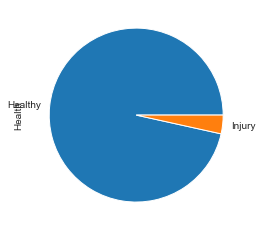

In [57]:
trained_df['Health'] = trained_df.Health.replace(to_replace=['Serious Injury', 'Minor Injury'], value='Injury')
trained_df['Health'].value_counts().plot(kind='pie')

<AxesSubplot:>

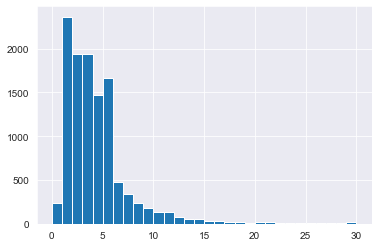

In [58]:
#  Verification by another method to check irregularity of Data was decreased
trained_df['PhotoAmt'].hist(bins=30)

In [59]:

    # TREBA DOROBIT !!!


# %%timeit
# sub_df = trained_df[trained_df.groupby('Species').Species.transform('count')>3].copy();
# sub_df_species.shape

4. Zistite počet chýbajúcich záznamov v jednotlivých stĺpoch tabuľky pre obe množiny.
Linky:


*   [Počet chýbajúcich záznamov](https://datatofish.com/count-nan-pandas-dataframe/)



Species - 0.0%
Age (days) - 0.0%
Gender - 0.0%
MaturitySize - 0.0%
FurLength - 0.0%
Vaccinated - 0.0%
Dewormed - 0.0%
Sterilized - 0.0%
Health - 0.0%
Quantity - 0.0%
Fee - 0.0%
VideoAmt - 0.0%
PhotoAmt - 0.0%
AdoptionSpeed - 0.0%
StateName - 0.0%
Primary Breed - 0.0%
Color 1 - 0.0%
AdoptionSpeed (months) - 0.0%


<AxesSubplot:>

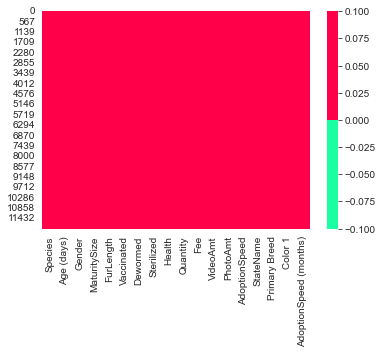

In [60]:
# identifiing undefined columns
#  Data Percentage List
for col in test_df.columns:
    pct_missing = np.mean(trained_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
#  Data Heatmap
cols = trained_df.columns
colours = ['#19FFA1', '#FF0049']
sns.heatmap(trained_df[cols].isnull(), cmap=sns.color_palette(colours))

5. Záznamy s chýbajúcimi hodnotami odstráňte, alebo nahraďte priemerom pre daný atribút/stĺpec - v prípade testovacej množiny záznamy neodstraňujte, môžete ich iba nahradiť. Priemerné hodnoty počítajte **VŽDY** len z trénovacej množiny, tieto následne použite pre obe množiny.

*Pri mazaní záznamov vždy najskôr zvážte, či takýmto úkonom neprídete o priveľké množstvo dát - ak v niektorom zo stĺpcov chýba napr. 80% hodnôt, je rozumnejšie tento stĺpec ďalej nepoužiť a ponechať si všetky záznamy.*

Linky:

*   [Pandas - práca s chýbajúcimi hodnotami](https://pandas.pydata.org/docs/user_guide/missing_data.html)
* [Nahradenie hodnôt pomocou knižnice](https://scikit-learn.org/stable/modules/impute.html)


6. Vyberte si 2 číselné stĺpce a zobrazte histogramy ich hodnôt pre obe množiny. Vypíšte:
*   priemernú hodnotu,
*   odchýlku,
* minimálnu a maximálnu hodnotu.

Linky:


*   [Pandas - histogram](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)



<AxesSubplot:>

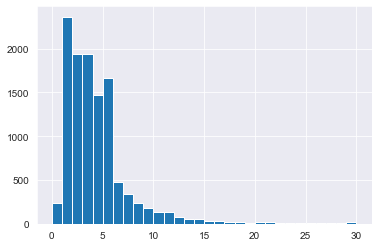

In [61]:
trained_df['PhotoAmt'].hist(bins=30)

In [62]:
trained_df.describe()

,Age (days),Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed (months)
count,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000
mean,10.733640,1.562489,21.650148,0.058063,3.887867,69.088006
std,20.794675,1.458731,80.402606,0.355272,3.474299,72.604753
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,2.000000,11.000000
50%,3.000000,1.000000,0.000000,0.000000,3.000000,35.000000
75%,12.000000,1.000000,0.000000,0.000000,5.000000,112.000000
max,933.000000,20.000000,3000.000000,8.000000,30.000000,250.000000


7. Normalizujte alebo škálujte dáta. Dodržte pritom nasledovné:
*   ak budete normalizovať dáta pomocou vlastného výpočtu - vypočítajte priemer a odchýlku, prípadne minimálnu a maximálnu hodnotu pre každý stĺpec samostatne z **TRÉNOVACEJ MNOŽINY**, tieto následne použite pri transformácii hodnôt pre obe množiny,
*   ak budete používať metódy nejakej knižnice, na nastavenie parametrov využite **TRÉNOVACIU MNOŽINU**, následne ich použite pre transformovanie dát v oboch množinách,
* normalizáciu vykonajte len pre číselné stĺpce.

*Uistite sa, že ste zachovali názvy stĺpcov aj po týchto úpravách. Pri použití knižnice sa môže stať, že o ne prídete.*

Linky:


*   [MinMax normalizácia](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
*   [Štandardizácia](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [63]:
# droping unreasonable numeric values using percentile
# age_50th_percentile = (trained_df['Age (days)'].quantile(0.50))
# age_95th_percentile = (trained_df['Age (days)'].quantile(0.99))
# trained_df['Age (days)'] = np.where(trained_df['Age (days)'] > age_95th_percentile, age_50th_percentile, trained_df['Age (days)'])
#
# quantity_50th_percentile = (trained_df['Quantity'].quantile(0.50))
# quantity_95th_percentile = (trained_df['Quantity'].quantile(0.99))
# trained_df['Quantity'] = np.where(trained_df['Quantity'] > quantity_95th_percentile, quantity_50th_percentile, trained_df['Quantity'])
#
# quantity_50th_percentile = (trained_df['Fee'].quantile(0.50))
# quantity_95th_percentile = (trained_df['Fee'].quantile(0.99))
# trained_df['Fee'] = np.where(trained_df['Fee'] > quantity_95th_percentile, quantity_50th_percentile, trained_df['Fee'])
# Verification that irregularity of Data was decreased
#  Verification Irregular Data by distribution table
from sklearn import preprocessing
trained_df.select_dtypes(include= 'number')
standard_scaler = preprocessing.StandardScaler()
trained_df['Age (days)'] = standard_scaler.fit_transform(trained_df['Age (days)'].values.reshape(-1,1))
trained_df['Fee'] = standard_scaler.fit_transform(trained_df['Fee'].values.reshape(-1,1))
trained_df['Quantity'] = standard_scaler.fit_transform(trained_df['Quantity'].values.reshape(-1,1))
trained_df['VideoAmt'] = standard_scaler.fit_transform(trained_df['VideoAmt'].values.reshape(-1,1))
trained_df['PhotoAmt'] = standard_scaler.fit_transform(trained_df['PhotoAmt'].values.reshape(-1,1))
trained_df['AdoptionSpeed (months)'] = standard_scaler.fit_transform(trained_df['AdoptionSpeed (months)'].values.reshape(-1,1))

trained_df[['Age (days)', 'Fee', 'Quantity', 'VideoAmt', 'PhotoAmt', 'AdoptionSpeed (months)']].describe()

,Age (days),Fee,Quantity,VideoAmt,PhotoAmt,AdoptionSpeed (months)
count,1.152200e+04,1.152200e+04,1.152200e+04,1.152200e+04,1.152200e+04,1.152200e+04
mean,-8.004359e-17,2.428191e-17,-5.322653e-16,6.142409e-16,5.657108e-17,-1.503359e-16
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-4.681036e-01,-2.692834e-01,-3.856183e-01,-1.634394e-01,-1.119085e+00,-9.378306e-01
25%,-4.200123e-01,-2.692834e-01,-3.856183e-01,-1.634394e-01,-5.434042e-01,-8.000926e-01
50%,-3.719210e-01,-2.692834e-01,-3.856183e-01,-1.634394e-01,-2.555639e-01,-4.695214e-01
75%,6.090093e-02,-2.692834e-01,-3.856183e-01,-1.634394e-01,3.201169e-01,5.910613e-01
max,4.435301e+01,3.704456e+01,1.263996e+01,2.235553e+01,7.516126e+00,2.491846e+00


8. Pre vybrané stĺpce z bodu č. 6 znova zobrazte histogramy a vypíšte vyššie spomenuté hodnoty.

<AxesSubplot:>

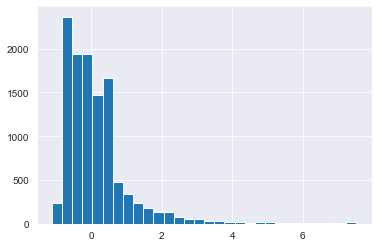

In [64]:
trained_df['PhotoAmt'].hist(bins=30)

9. Pre kategorické hodnoty využite vhodný spôsob kódovania:


*   hodnoty, ktoré reprezentujú postupnosť môžeme kódovať číslami 1-N alebo 0-N (N je počet kategórií), napr. malý, veľký, stredný => 0, 1, 2 alebo 1, 2, 3,
*   hodnoty, ktoré nereprezentujú postupnosť kódujeme iným spôsobom, napr. biela, čierna, zelená (napr. one-hot encoding).

*Pamätajte, že pri kódovaní platí rovnaké pravidlo ako pri normalizácii číselných dát. Nastavenie kódovania vykonajte na **TRÉNOVACEJ MNOŽINE** a následne aplikujte pre obe množiny.*

*Uistite sa, že ste zachovali názvy stĺpcov aj po týchto úpravách. Pri použití knižnice sa môže stať, že o ne prídete.*

Linky:


*   [Label encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
*   [One-hot encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)



In [65]:
le = preprocessing.OrdinalEncoder(categories=[['Adopted between 1-7 days',
                                              'Adopted between 8-30 days',
                                              'Adopted between 31-90 days',
                                              'No adoption after 90 days']])
trained_df['AdoptionSpeed'] = (le.fit_transform(trained_df['AdoptionSpeed'].values.reshape(-1, 1)))

In [66]:
le = preprocessing.OrdinalEncoder(categories=[['Small',
                                               'Medium',
                                               'Large']])
trained_df['MaturitySize'] = (le.fit_transform(trained_df['MaturitySize'].values.reshape(-1, 1)))
trained_df['MaturitySize'].value_counts()

1.0    7993
0.0    2535
2.0     994
Name: MaturitySize, dtype: int64

In [67]:
le = preprocessing.OrdinalEncoder(categories=[['Short',
                                               'Medium',
                                               'Long']])
trained_df['FurLength'] = (le.fit_transform(trained_df['FurLength'].values.reshape(-1, 1)))
trained_df['FurLength'].value_counts()

0.0    6810
1.0    4076
2.0     636
Name: FurLength, dtype: int64

In [68]:
le = preprocessing.LabelEncoder()
trained_df['Primary Breed'] = le.fit_transform(trained_df['Primary Breed'].values.reshape(-1, 1))
trained_df['Primary Breed'].value_counts()

/Users/adam.samko/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100    4670
55     2747
54      954
148     262
53      217
       ... 
93        1
7         1
162       1
11        1
101       1
Name: Primary Breed, Length: 167, dtype: int64

In [69]:
le = preprocessing.LabelEncoder()
trained_df['StateName'] = le.fit_transform(trained_df['StateName'].values.reshape(-1, 1))
trained_df['StateName'].value_counts()

/Users/adam.samko/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12    6709
3     2955
9      669
0      367
8      325
6      184
5      109
1       82
7       64
13      21
10      17
2       10
11       8
4        2
Name: StateName, dtype: int64

In [70]:
trained_df = pandas.get_dummies(trained_df, columns=["Species"])
trained_df = pandas.get_dummies(trained_df, columns=["Gender"], )
trained_df = pandas.get_dummies(trained_df, columns=["Vaccinated"], prefix=["Vaccinated"])
trained_df = pandas.get_dummies(trained_df, columns=["Dewormed"], prefix=["Dewormed"])
trained_df = pandas.get_dummies(trained_df, columns=["Sterilized"], prefix=["Sterilized"])
trained_df = pandas.get_dummies(trained_df, columns=["Health"], prefix=["Sterilized"])
trained_df = pandas.get_dummies(trained_df, columns=["Color 1"], prefix=["Color"])
trained_df

,Age (days),MaturitySize,FurLength,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,StateName,Primary Breed,...,Sterilized_Yes,Sterilized_Healthy,Sterilized_Injury,Color_Black,Color_Brown,Color_Cream,Color_Golden,Color_Gray,Color_White,Color_Yellow
0,0.012810,1.0,0.0,-0.385618,-0.269283,-0.163439,-0.543404,1.0,12,16,...,0,1,0,1,0,0,0,0,0,0
1,-0.371921,1.0,1.0,-0.385618,-0.269283,-0.163439,-0.543404,3.0,3,100,...,0,1,0,0,0,1,0,0,0,0
2,-0.468104,1.0,0.0,-0.385618,-0.269283,-0.163439,-0.831245,2.0,12,90,...,0,1,0,0,1,0,0,0,0,0
3,-0.323830,0.0,2.0,-0.385618,-0.269283,-0.163439,-0.831245,0.0,12,166,...,0,1,0,1,0,0,0,0,0,0
4,-0.275738,1.0,0.0,-0.385618,-0.269283,-0.163439,0.032276,2.0,12,100,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,-0.468104,1.0,1.0,0.985495,-0.269283,-0.163439,0.895798,1.0,3,54,...,0,1,0,1,0,0,0,0,0,0
11990,-0.420012,1.0,0.0,-0.385618,-0.269283,-0.163439,0.607957,2.0,12,55,...,1,1,0,0,0,0,1,0,0,0
11991,-0.468104,2.0,1.0,-0.385618,-0.269283,-0.163439,1.183638,2.0,9,136,...,0,1,0,0,1,0,0,0,0,0
11992,-0.420012,1.0,0.0,-0.385618,-0.269283,-0.163439,-0.831245,1.0,12,144,...,0,1,0,0,1,0,0,0,0,0


In [71]:
test_df = test_df[test_df['AdoptionSpeed'] != 'Adopted on the same day']
test_df.value_counts()

Species  Age (days)  Gender  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health   Quantity  Fee  VideoAmt  PhotoAmt  AdoptionSpeed               StateName     Primary Breed         Color 1  AdoptionSpeed (months)
Cat      2           Mixed   Medium        Medium     No          No        No          Healthy  4         0    0         3.0       Adopted between 1-7 days    Selangor      Domestic Medium Hair  Black    5                         2
Dog      1           Female  Medium        Medium     No          Yes       No          Healthy  1         0    0         3.0       Adopted between 1-7 days    Selangor      Mixed Breed           Brown    5                         2
Cat      2           Female  Small         Short      No          Yes       No          Healthy  1         0    0         3.0       Adopted between 1-7 days    Pulau Pinang  Domestic Short Hair   Black    2                         2
         0           Female  Large         Medium     No          No     

In [72]:
le = preprocessing.OrdinalEncoder(categories=[['Adopted between 1-7 days',
                                               'Adopted between 8-30 days',
                                               'Adopted between 31-90 days',
                                               'No adoption after 90 days']])
test_df['AdoptionSpeed'] = (le.fit_transform(test_df['AdoptionSpeed'].values.reshape(-1, 1)))
le = preprocessing.OrdinalEncoder(categories=[['Small',
                                               'Medium',
                                               'Large']])
test_df['MaturitySize'] = (le.fit_transform(test_df['MaturitySize'].values.reshape(-1, 1)))
test_df['MaturitySize'].value_counts()
le = preprocessing.OrdinalEncoder(categories=[['Short',
                                               'Medium',
                                               'Long']])
test_df['FurLength'] = (le.fit_transform(test_df['FurLength'].values.reshape(-1, 1)))
test_df['FurLength'].value_counts()
le = preprocessing.LabelEncoder()
test_df['Primary Breed'] = le.fit_transform(test_df['Primary Breed'].values.reshape(-1, 1))
test_df['Primary Breed'].value_counts()
le = preprocessing.LabelEncoder()
test_df['StateName'] = le.fit_transform(test_df['StateName'].values.reshape(-1, 1))
test_df['StateName'].value_counts()
test_df = pandas.get_dummies(test_df, columns=["Species"])
test_df = pandas.get_dummies(test_df, columns=["Gender"], )
test_df = pandas.get_dummies(test_df, columns=["Vaccinated"], prefix=["Vaccinated"])
test_df = pandas.get_dummies(test_df, columns=["Dewormed"], prefix=["Dewormed"])
test_df = pandas.get_dummies(test_df, columns=["Sterilized"], prefix=["Sterilized"])
test_df = pandas.get_dummies(test_df, columns=["Health"], prefix=["Sterilized"])
test_df = pandas.get_dummies(test_df, columns=["Color 1"], prefix=["Color"])
test_df


ValueError: Found unknown categories ['Extra Large'] in column 0 during fit

In [ ]:
# trained_df[]


10. Uložte si všetko potrebné pre ďalšiu prácu s dátami na ostatných cvičeniach:


*   pripravenú trénovaciu množinu,
*   pripravenú testovaciu množinu,
* nastavenie normalizácie/škálovania (prípadne nastavené modely knižnice),
* nastavenie kódodovania (prípadne nastavené modely knižnice).

Linky:


*   [Uloženie dát do csv súboru](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)



In [ ]:
trained_df.to_csv(data_path + 'train_data_edited.csv')
test_df.to_csv(data_path + 'test_data_edited.csv')
